In [2]:
# 03_modeling_and_insights.ipynb
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the feature-engineered dataset
df = pd.read_csv("../data/processed/womens_fitness_realistic.csv")

print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (1964, 21)


,id,exercise,calories_burn,dream_weight,actual_weight,age,gender,duration,heart_rate,bmi,...,exercise_intensity,calories_per_min,weight_diff,Cycle_Day,Cycle_Phase,Estrogen_Level,Progesterone_Level,Fatigue_Level,Recommended_Intensity,Adjusted_Calories
0,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,...,3,12.24,4.32,7,Follicular,99.630163,1.519508,0.331315,High,457.950211
1,6,Exercise 1,479.722690,78.887578,80.596592,60,Female,41,169,34.719336,...,10,11.70,-1.71,20,Luteal,208.513017,17.438136,0.583026,Moderate,503.708825
2,12,Exercise 1,376.552649,95.196283,97.368961,35,Female,28,158,34.565117,...,6,13.45,-2.17,15,Ovulatory,216.209243,2.880733,0.267451,High,433.035547
3,13,Exercise 1,311.106024,83.679152,84.428659,54,Female,48,173,34.522637,...,4,6.48,-0.75,11,Follicular,149.321402,1.152262,0.304101,High,342.216626
4,17,Exercise 2,216.866393,84.638075,88.314527,38,Female,46,119,33.678882,...,7,4.71,-3.68,8,Follicular,176.193106,1.990293,0.479860,Moderate,238.553033


In [3]:
# 1. Basic Summary and Checks
# ==========================================
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Cycle Phase Distribution ---")
print(df['Cycle_Phase'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1964 non-null   int64  
 1   exercise               1964 non-null   object 
 2   calories_burn          1964 non-null   float64
 3   dream_weight           1964 non-null   float64
 4   actual_weight          1964 non-null   float64
 5   age                    1964 non-null   int64  
 6   gender                 1964 non-null   object 
 7   duration               1964 non-null   int64  
 8   heart_rate             1964 non-null   int64  
 9   bmi                    1964 non-null   float64
 10  weather_conditions     1964 non-null   object 
 11  exercise_intensity     1964 non-null   int64  
 12  calories_per_min       1964 non-null   float64
 13  weight_diff            1964 non-null   float64
 14  Cycle_Day              1964 non-nu

In [5]:
# 2. Average Metrics by Cycle Phase
# ==========================================
phase_summary = df.groupby('Cycle_Phase')[[
    'calories_burn', 'Adjusted_Calories',
    'heart_rate', 'Fatigue_Level',
    'Estrogen_Level', 'Progesterone_Level'
]].mean().reset_index()

print("\n--- Average Metrics by Cycle Phase ---")
display(phase_summary)


--- Average Metrics by Cycle Phase ---


,Cycle_Phase,calories_burn,Adjusted_Calories,heart_rate,Fatigue_Level,Estrogen_Level,Progesterone_Level
0,Follicular,310.277851,341.305636,137.613153,0.348867,120.608571,1.949275
1,Luteal,302.562036,317.690137,139.113780,0.645835,175.469545,17.726516
2,Menstrual,300.833683,270.750315,140.604167,0.748756,24.913855,1.231896
3,Ovulatory,308.516185,354.793612,139.761029,0.254208,294.395113,3.991616


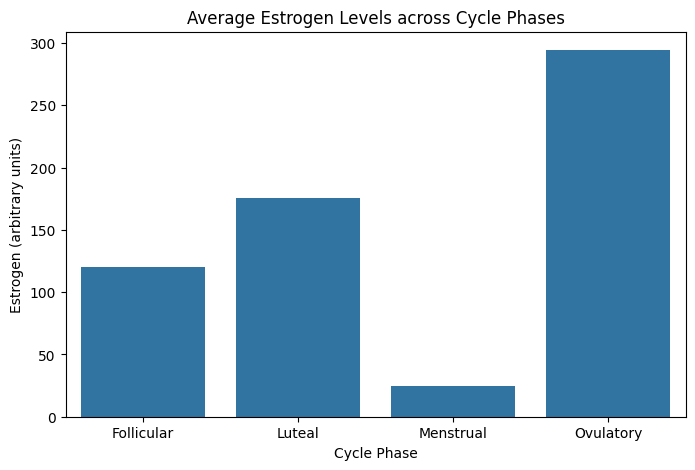

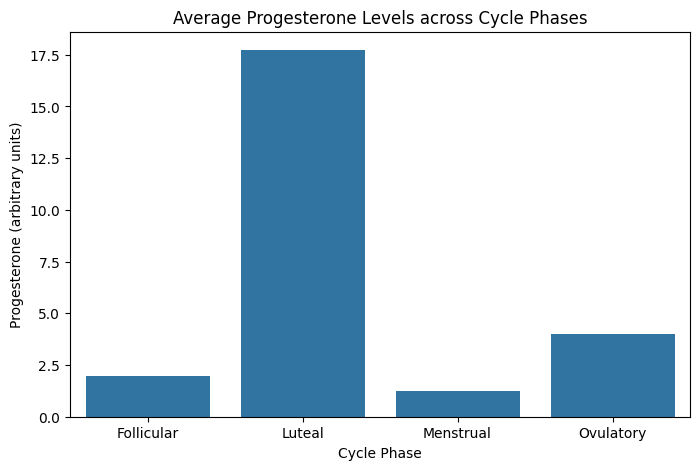

In [6]:
# 3. Visualization: Hormones across phases
# ==========================================
plt.figure(figsize=(8,5))
sns.barplot(x='Cycle_Phase', y='Estrogen_Level', data=phase_summary)
plt.title("Average Estrogen Levels across Cycle Phases")
plt.ylabel("Estrogen (arbitrary units)")
plt.xlabel("Cycle Phase")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Cycle_Phase', y='Progesterone_Level', data=phase_summary)
plt.title("Average Progesterone Levels across Cycle Phases")
plt.ylabel("Progesterone (arbitrary units)")
plt.xlabel("Cycle Phase")
plt.show()

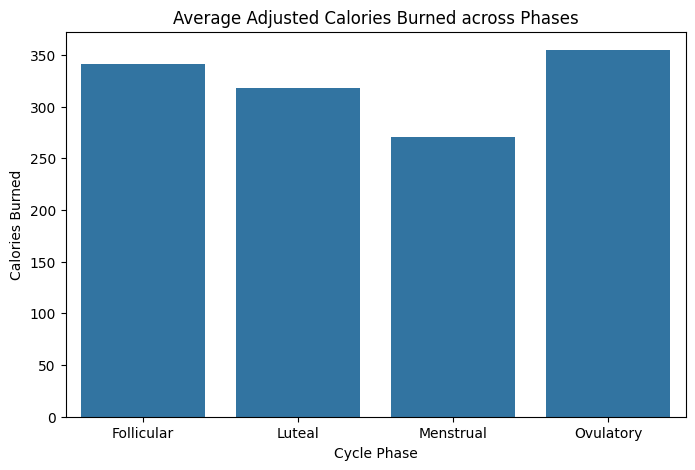

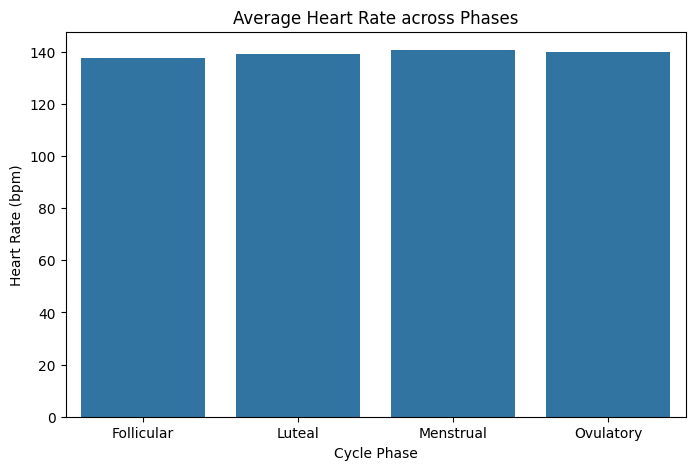

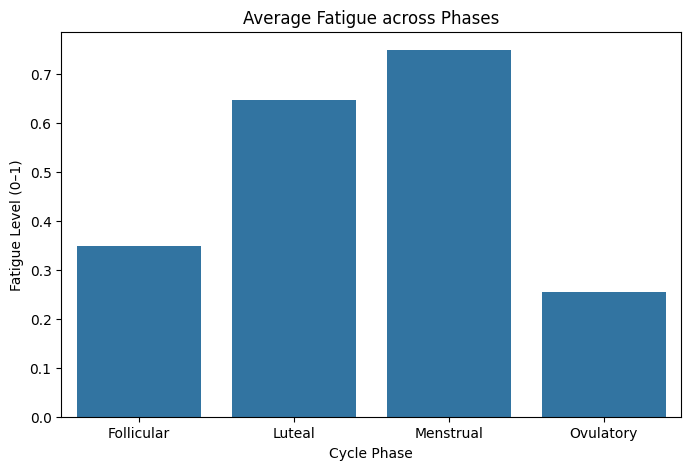

In [8]:
# 4. Visualization: Performance metrics
# ==========================================
plt.figure(figsize=(8,5))
sns.barplot(x='Cycle_Phase', y='Adjusted_Calories', data=phase_summary)
plt.title("Average Adjusted Calories Burned across Phases")
plt.ylabel("Calories Burned")
plt.xlabel("Cycle Phase")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Cycle_Phase', y='heart_rate', data=phase_summary)
plt.title("Average Heart Rate across Phases")
plt.ylabel("Heart Rate (bpm)")
plt.xlabel("Cycle Phase")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Cycle_Phase', y='Fatigue_Level', data=phase_summary)
plt.title("Average Fatigue across Phases")
plt.ylabel("Fatigue Level (0–1)")
plt.xlabel("Cycle Phase")
plt.show()


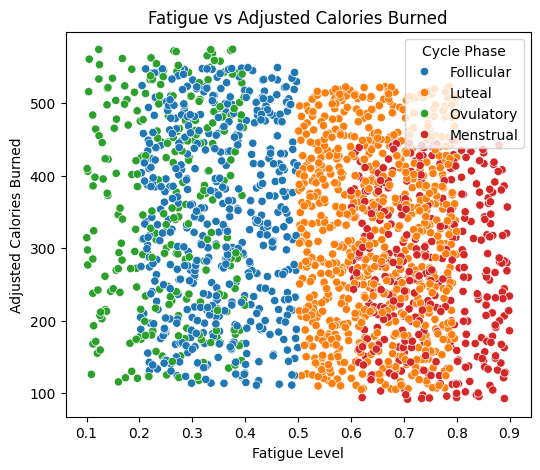

In [9]:
# 5. Relationship between Fatigue & Performance
# ==========================================
plt.figure(figsize=(6,5))
sns.scatterplot(x='Fatigue_Level', y='Adjusted_Calories', hue='Cycle_Phase', data=df)
plt.title("Fatigue vs Adjusted Calories Burned")
plt.xlabel("Fatigue Level")
plt.ylabel("Adjusted Calories Burned")
plt.legend(title="Cycle Phase")
plt.show()

C:\Users\anind\AppData\Local\Temp\ipykernel_18892\1427299123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommended_Intensity', data=df, palette='coolwarm')


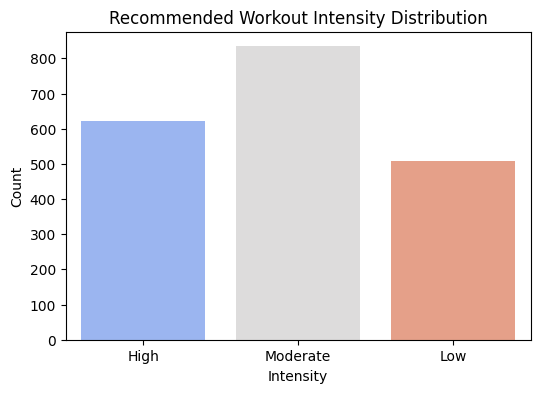

In [10]:
# 6. Recommended Intensity Distribution
# ==========================================
plt.figure(figsize=(6,4))
sns.countplot(x='Recommended_Intensity', data=df, palette='coolwarm')
plt.title("Recommended Workout Intensity Distribution")
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.show()

In [11]:
# 7. Summary Insights
# ==========================================
insights = """
1. Estrogen peaks during the Ovulatory phase, which often corresponds to higher workout performance and calorie burn.
2. Progesterone is highest during the Luteal phase, where fatigue also tends to increase.
3. The Follicular and Ovulatory phases show slightly higher adjusted calorie burn and lower fatigue, 
   suggesting these are ideal windows for strength training or high-intensity workouts.
4. Menstrual and Luteal phases show elevated fatigue levels, aligning better with low- or moderate-intensity exercises 
   like yoga, mobility, or light cardio.
5. Heart rate variability across phases suggests physiological differences that could affect endurance and recovery.
"""
print("\n--- Summary Insights ---")
print(insights)


--- Summary Insights ---

1. Estrogen peaks during the Ovulatory phase, which often corresponds to higher workout performance and calorie burn.
2. Progesterone is highest during the Luteal phase, where fatigue also tends to increase.
3. The Follicular and Ovulatory phases show slightly higher adjusted calorie burn and lower fatigue, 
   suggesting these are ideal windows for strength training or high-intensity workouts.
4. Menstrual and Luteal phases show elevated fatigue levels, aligning better with low- or moderate-intensity exercises 
   like yoga, mobility, or light cardio.
5. Heart rate variability across phases suggests physiological differences that could affect endurance and recovery.

